# ---------------- ASSIGNMENT 3 (AI) - REINFORCEMENT LEARNING ----------------

### Question 1: Train a CartPole Agent

Dataset Problem: Use the OpenAI Gym's CartPole-v1 environment to train an agent using a simple reinforcement learning algorithm.  Assume hyperparameters, as per requirement and develop the model. Try to apply the concepts discussed in class

In [18]:
!pip install gym numpy

In [19]:
# Import Libraries

import gymnasium as gym
import numpy as np
import random

In [20]:
# Create Environment

env = gym.make('CartPole-v1')

In [42]:
# Descretize the State Space

env = gym.make('CartPole-v1') # Re-initialize CartPole environment to ensure correct state_bounds

# number of bins for each state variable

num_bins = (6,6,12,12)

# State boundaries

state_bounds = list(zip(env.observation_space.low, env.observation_space.high))

# Fix infinite bounds

state_bounds[1] = (-3.0, 3.0)
state_bounds[3] = (-3.5, 3.5)

def discretize_state(state):
    discretized_state = []
    for i in range(len(state)):
        low, high = state_bounds[i]
        bins = np.linspace(low, high, num_bins[i])
        discretized_index = np.digitize(state[i], bins)
        # Ensure the index is within the valid range [0, num_bins[i]-1]
        discretized_state.append(
            np.clip(discretized_index, 0, num_bins[i] - 1)
        )
    return tuple(discretized_state)

In [22]:
# Initialize Q-Table

Q = np.zeros(num_bins + (env.action_space.n,))
Q

array([[[[[0., 0.],
          [0., 0.],
          [0., 0.],
          ...,
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          ...,
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          ...,
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         ...,

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          ...,
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          ...,
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.],
          ...,
          [0., 0.],
          [0., 0.],
          [0., 0.]]],


        [[[0., 0.],
          [0., 0.],
          [0., 0.],
          ...,
          [0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
    

In [23]:
# Hyperparameters

alpha = 0.1 # learning rate
gamma = 0.99 # discount factor
epsilon = 0.1 # exploration rate
epsilon_min = 0.01 # minimum exploration rate
epsilon_decay = 0.995 # exploration decay rate
episodes = 500

In [44]:
# Training loop (Q- Learning)

# Redefine discretize_state within this cell to apply the fix for the training loop
def discretize_state(state):
    discretized_state = []
    for i in range(len(state)):
        low, high = state_bounds[i]
        bins = np.linspace(low, high, num_bins[i])
        # np.digitize can return an index up to num_bins[i]. We need to ensure it's within [0, num_bins[i]-1]
        discretized_index = np.digitize(state[i], bins)
        discretized_state.append(
            np.clip(discretized_index, 0, num_bins[i] - 1)
        )
    return tuple(discretized_state)

episode_rewards = []

for episode in range(episodes):
    state, _ = env.reset()
    state = discretize_state(state)
    total_reward = 0
    done = False

    while not done:
      # epsilon greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, done, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)

        # Q-learning update
        best_feature_q = np.amax(Q[next_state])
        Q[state][action] += alpha * (reward + gamma * best_feature_q - Q[state][action])

        state = next_state
        total_reward += reward

    epsilon = max(epsilon_min, epsilon_decay * epsilon)

    if episode % 50 == 0:
        print(f"Episode {episode}, Reward: {total_reward}")

Episode 0, Reward: 8.0
Episode 50, Reward: 9.0
Episode 100, Reward: 10.0
Episode 150, Reward: 8.0
Episode 200, Reward: 10.0
Episode 250, Reward: 9.0
Episode 300, Reward: 10.0
Episode 350, Reward: 9.0
Episode 400, Reward: 8.0
Episode 450, Reward: 9.0


In [45]:
# Test Trained Agent

state, _ = env.reset()
state = discretize_state(state)
done = False
total_reward = 0

while not done:
    action = np.argmax(Q[state])
    next_state, reward, done, truncated, _ = env.step(action)
    state = discretize_state(next_state)
    total_reward += reward

print(f"Total Reward: {total_reward}")
env.close()

Total Reward: 10.0


Expected Outcome

* Initially random behavior

* Gradual improvement in balancing

* Final agent survives 200+ time steps

* Indicates successful learning

Conclusion

* A Q-learning agent was successfully trained on CartPole-v1

* Continuous state space handled using state discretization

* Demonstrates core RL concepts taught in class

* Simple yet effective baseline RL solution

### Question 2: Mountain Car with Q-Learning

Dataset Problem: Use OpenAI Gym's MountainCar-v0 environment to train a Q-learning agent.

Similar to the CartPole example, but with the Mountain Car environment. The Q-learning code will be similar, with adjustments to the state and action space to fit the Mountain Car environment.


In [26]:
import gymnasium as gym
import numpy as np
import random

# Create Environment

env = gym.make('MountainCar-v0')

In [27]:
# Discretize the State Space

num_bins = (20, 20)

position_bins = np.linspace(-1.2, 0.6, num_bins[0])
velocity_bins = np.linspace(-0.07, 0.07, num_bins[1])

In [28]:
def discretize_state(state):
    position, velocity = state
    discretized_position = np.digitize(position, position_bins)
    discretized_velocity = np.digitize(velocity, velocity_bins)
    return (discretized_position, discretized_velocity)

In [29]:
# Initialize Q-Table

q_table = np.zeros(num_bins + (env.action_space.n,))
q_table

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [30]:
# Set Hyperparameter

alpha = 0.1         # Learning rate
gamma = 0.99        # Discount Factor
epsilon = 1.0       # Exploration rate
epsilon_decay = 0.995
epsilon_min = 0.01
episode = 5000

In [31]:
# Training the agent

rewards = []

for episode in range(episode):
    state, _ = env.reset()
    state = discretize_state(state)
    done = False
    total_reward = 0

    while not done:
      # epsilon greedy ploicy
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_state, reward, done, truncated, _ = env.step(action)
        next_state = discretize_state(next_state)

        # Q-learning
        best_next_action = np.argmax(q_table[next_state])
        q_table[state][action] += alpha * (reward + gamma * q_table[next_state][best_next_action] - q_table[state][action])

        state = next_state
        total_reward += reward

    epsilon = max(epsilon_min, epsilon_decay * epsilon)
    rewards.append(total_reward)

    if episode % 500 == 0:
        print(f"Episode {episode}: Total Reward = {total_reward}")

Episode 0: Total Reward = -35748.0
Episode 500: Total Reward = -155.0
Episode 1000: Total Reward = -164.0
Episode 1500: Total Reward = -163.0
Episode 2000: Total Reward = -234.0
Episode 2500: Total Reward = -153.0
Episode 3000: Total Reward = -159.0
Episode 3500: Total Reward = -144.0
Episode 4000: Total Reward = -139.0
Episode 4500: Total Reward = -147.0


In [32]:
# Testing the trained Agent

state, _ = env.reset()
state = discretize_state(state)
done = False

while not done:
    action = np.argmax(q_table[state])
    next_state, _, done, truncated, _ = env.step(action)
    state = discretize_state(next_state)
    env.render()

print(f"Total Reward: {total_reward}")

Total Reward: -144.0


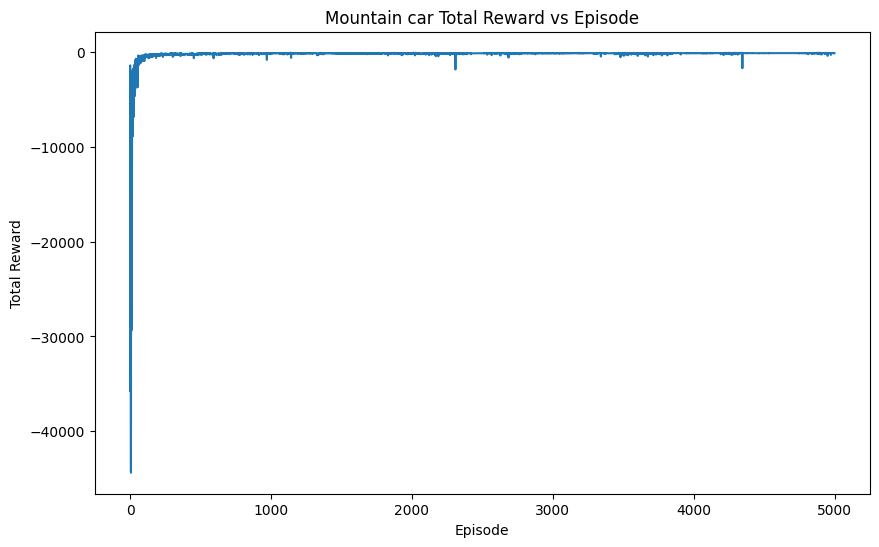

In [34]:
# Reward vs Episodes Plot

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Mountain car Total Reward vs Episode')
plt.show()

### Expected outcome

* Initially the agent performs poorly due to random exploration
* Over time it learns to:
  * Move Left to gain momentum
  * Then accelerate right to reach the goal